# Data Exploration

## Library imports

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import importlib 

from pathlib import Path 

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


In [4]:
# import other libraries 
# check if jcds library is installed
package_name = "jcds"

if importlib.util.find_spec(package_name) is None:
    print(f" '{package_name}' not found. Installing from Github... ")
    subprocess.check_call(
        [
            sys.executable,
            "-m",
            "pip",
            "install",
            "https://github.com/junclemente/jcds.git",
        ]
    )
else:
    print(f" '{package_name}' is already installed.")

from jcds import eda as jeda
from jcds import reports as jrep

 'jcds' not found. Installing from Github... 


NameError: name 'subprocess' is not defined

## Import dataset

In [5]:
data_folder = Path("../data")

df = pd.read_pickle(data_folder / "ews_dataset.pkl")

df.head()

,cdscode,county,virtual,magnet,yearroundyn,latitude,longitude,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,1611190130229,NaN,N,N,N,37.764958,-122.24593,N,394.0,92.4,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,1611270130450,NaN,N,N,N,37.896661,-122.29257,N,284.0,95.1,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,1611430131177,NaN,N,N,N,37.868913,-122.27120,Y,861.0,90.5,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,1611500132225,NaN,N,N,N,37.705184,-122.07847,N,672.0,96.4,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,1611500133876,NaN,V,N,N,37.713501,-122.09222,N,31.0,100.0,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


## Basic dataset info

In [ ]:
jrep.data_info(df, show_columns=True)

NameError: name 'jrep' is not defined

In [5]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 46

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['yearroundyn']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 3 constant columns.
 * Columns: ['high_conn', 'low_conn', 'conn_ratio']
There are 7 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'high_conn', 'low_conn', 'conn_ratio']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 4 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


In [6]:
jrep.data_quality(df, show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 49082
 * Memory usage: 0.64 MB
 * Rows: 1067
 * Columns: 46

MISSING DATA:
 * Total entries: 5860 missing (11.9%)

ROWS:
----------
 * Rows missing any: 1067
 * Rows missing all: 0

DUPLICATES: 0

COLUMNS:
----------------
Columns missing any: 35
	'stu_adm_ratio': 1037 missing (97.2%)
	'stu_psv_ratio': 1037 missing (97.2%)
	'stu_tch_ratio': 1025 missing (96.1%)
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
	'pct_associate': 96 missing (9.0%)
	'pct_bachelors': 96 missing (9.0%)
	'pct_bachelors_plus': 96 missing (9.0%)
	'pct_master': 96 missing (9.0%)
	'pct_master_plus': 96 missing (9.0%)
	'pct_doctorate': 96 missing (9.0%)
	'pct_juris_doctor': 96 missing (9.0%)
	'pct_no_degree': 96 missing (9.0%)
	'pct_experienced': 96 missing (9.0%)
	'pct_inexperienced': 96 missing (9.0%)
	'pct

In [7]:
# list features and target
target = "regular_hs_diploma_graduates_rate"
num_cols = ['cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'avg_safety_score', 'high_conn', 'low_conn', 'conn_ratio', 'school_climate_index']

cat_cols = ['virtual', 'magnet', 'yearroundyn', 'multilingual']

In [8]:
df[num_cols].head(10)

,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,eligible_cumulative_enrollment,unexcused_absences_percent,outofschool_suspension_absences_percent,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,394.0,92.4,73.9,22.8,2.3,1.0,12.7,1841.0,23.5,0.5,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,284.0,95.1,67.8,21.5,3.5,0.0,70.3,1192.0,46.2,0.4,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,861.0,90.5,62.3,12.1,8.1,0.8,5.2,3281.0,24.1,0.0,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,672.0,96.4,72.8,25.0,2.2,0.0,3.5,2771.0,28.0,0.9,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,31.0,100.0,64.5,6.5,0.0,0.0,8.3,420.0,19.1,3.8,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
5,40.0,95.0,76.3,0.0,5.0,0.0,29.6,186.0,67.9,0.0,...,1.00000,0.545455,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
6,574.0,94.4,73.6,19.0,3.3,0.0,2.3,2550.0,10.8,1.1,...,1.00000,0.500397,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
7,548.0,95.1,75.0,30.3,4.4,0.0,2.1,2345.0,22.2,0.8,...,1.00000,0.497624,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
8,350.0,91.1,26.0,13.8,7.7,0.0,4.6,1370.0,20.8,1.2,...,1.00000,0.513699,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
9,485.0,96.5,67.9,38.0,2.1,0.0,1.4,1984.0,4.5,0.3,...,1.00000,0.526129,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


In [9]:
df[cat_cols].head(10)

,virtual,magnet,yearroundyn,multilingual
0,N,N,N,N
1,N,N,N,N
2,N,N,N,Y
3,N,N,N,N
4,V,N,N,N
5,N,N,N,N
6,N,N,N,N
7,N,Y,N,N
8,N,N,N,N
9,N,N,N,N


# Bivariate Analysis

## Numerical Features

In [10]:
df_num = df[num_cols].copy()

### Correlation Heatmap

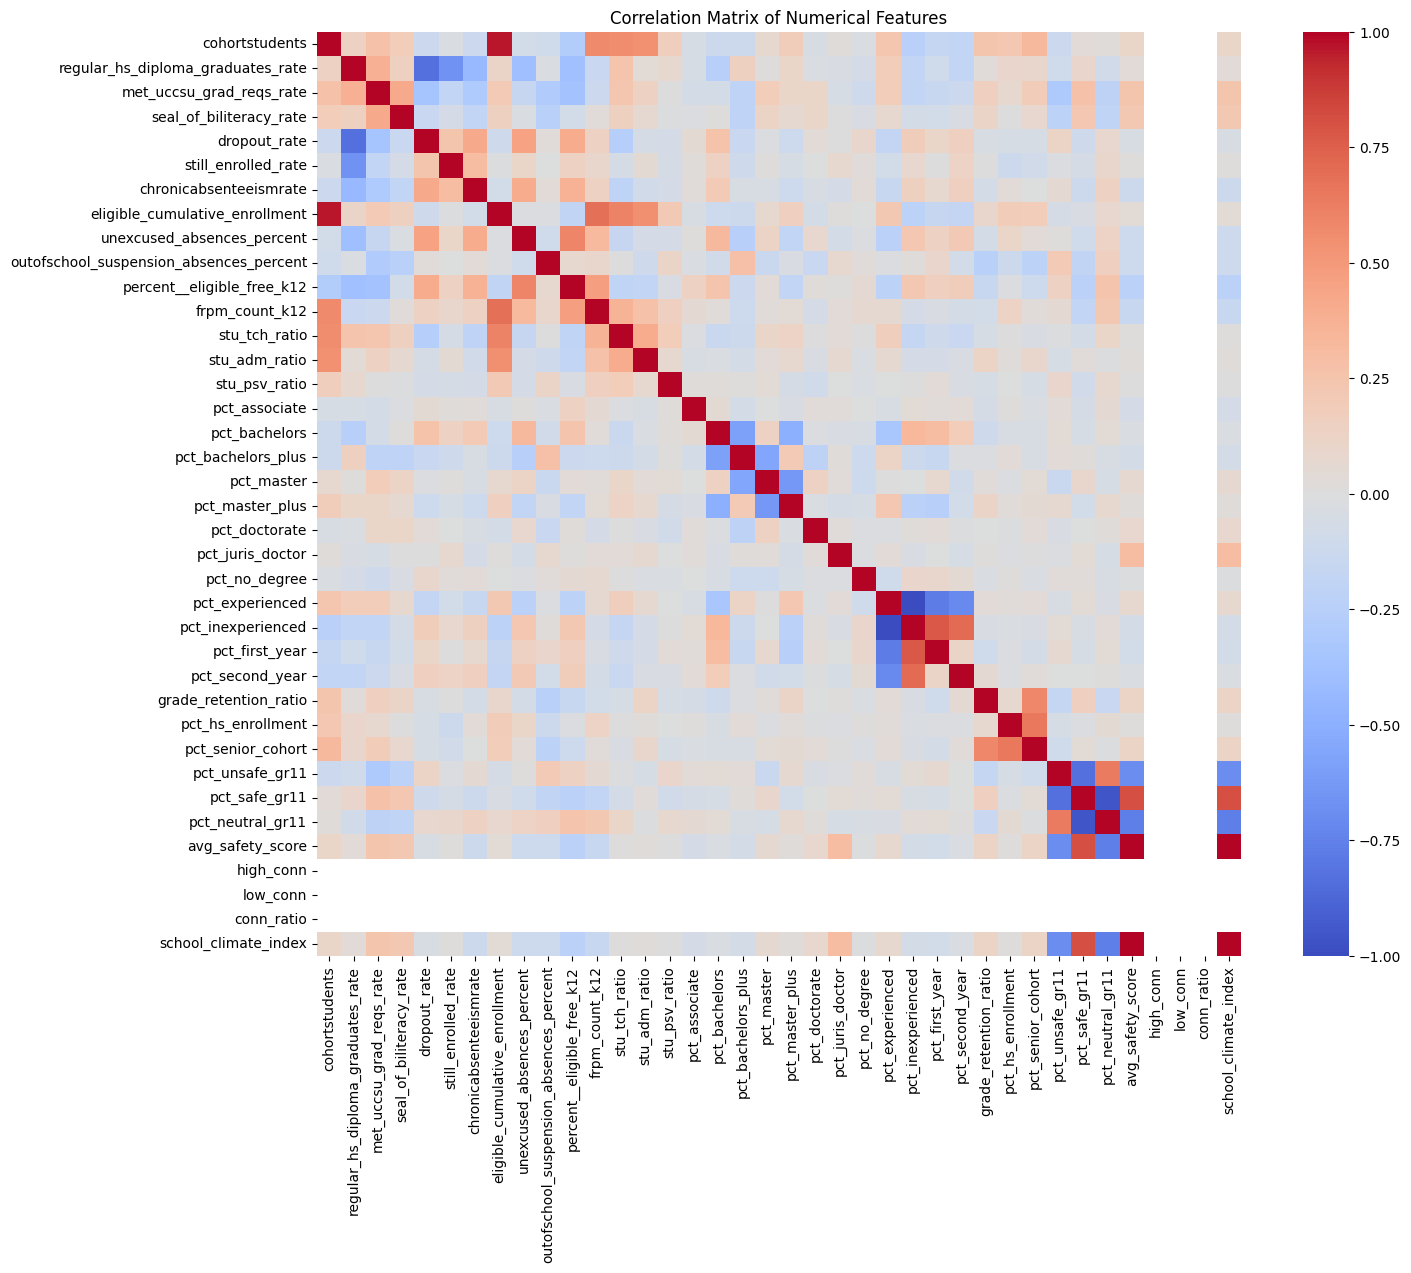

In [11]:
#Calculate correlation between numerical features
corr_matrix = df_num.corr(method= 'pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Strongest Correlation Between Features

In [12]:
# Find all pairs of features and their correlation value
#Only keep upper triangle to avoid duplicate pairs
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_matrix_upper = corr_matrix.where(upper_triangle)

# Stack the matrix to get feature pairs and remove NaN values
corr_pairs = corr_matrix_upper.stack(dropna=True)

#Sort by absoloute correlation value
corr_pairs_sorted = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

#Show top 10 correlated feature pairs
print("Top 10 correlated feature pairs:")
print(corr_pairs_sorted.head(10))


Top 10 correlated feature pairs:
avg_safety_score                   school_climate_index              1.000000
pct_experienced                    pct_inexperienced                -1.000000
cohortstudents                     eligible_cumulative_enrollment    0.964129
pct_safe_gr11                      pct_neutral_gr11                 -0.957428
regular_hs_diploma_graduates_rate  dropout_rate                     -0.831801
pct_unsafe_gr11                    pct_safe_gr11                    -0.829641
pct_safe_gr11                      avg_safety_score                  0.808758
                                   school_climate_index              0.808758
pct_experienced                    pct_first_year                   -0.778069
pct_inexperienced                  pct_first_year                    0.778069
dtype: float64


/var/folders/tt/60h8k_fs7xdc7b85p1qmwkjh0000gn/T/ipykernel_93134/1431607834.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  corr_pairs = corr_matrix_upper.stack(dropna=True)


### Correlations with Graduation Rates

In [13]:
#Correlation with target variable
target_corr = corr_matrix[target].drop(target).sort_values(ascending=False)
print(f"Correlation of features with target variable '{target}':")
print(target_corr)


Correlation of features with target variable 'regular_hs_diploma_graduates_rate':
met_uccsu_grad_reqs_rate                   0.375401
stu_tch_ratio                              0.254204
pct_experienced                            0.183584
pct_bachelors_plus                         0.150677
seal_of_biliteracy_rate                    0.149739
cohortstudents                             0.135283
eligible_cumulative_enrollment             0.111245
pct_master_plus                            0.107726
pct_safe_gr11                              0.101410
pct_hs_enrollment                          0.097019
pct_senior_cohort                          0.086160
stu_psv_ratio                              0.073253
stu_adm_ratio                              0.045436
avg_safety_score                           0.035522
school_climate_index                       0.035522
grade_retention_ratio                      0.024173
pct_master                                 0.012945
outofschool_suspension_absences_pe

### Bar Chart for Gradutation Rate Correlation

/var/folders/tt/60h8k_fs7xdc7b85p1qmwkjh0000gn/T/ipykernel_93134/157264960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos_corr.values,


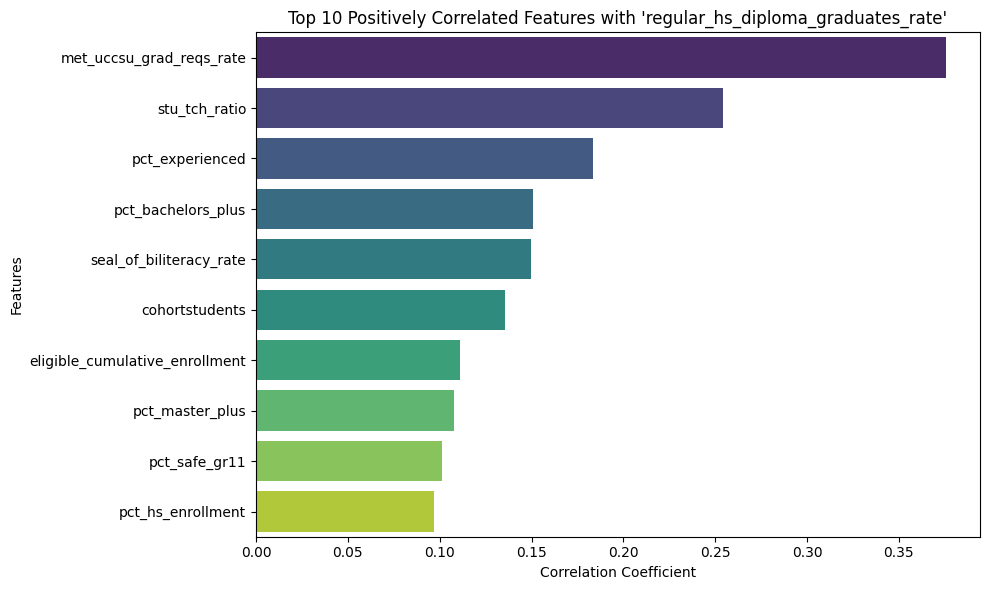

/var/folders/tt/60h8k_fs7xdc7b85p1qmwkjh0000gn/T/ipykernel_93134/157264960.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg_corr.values,


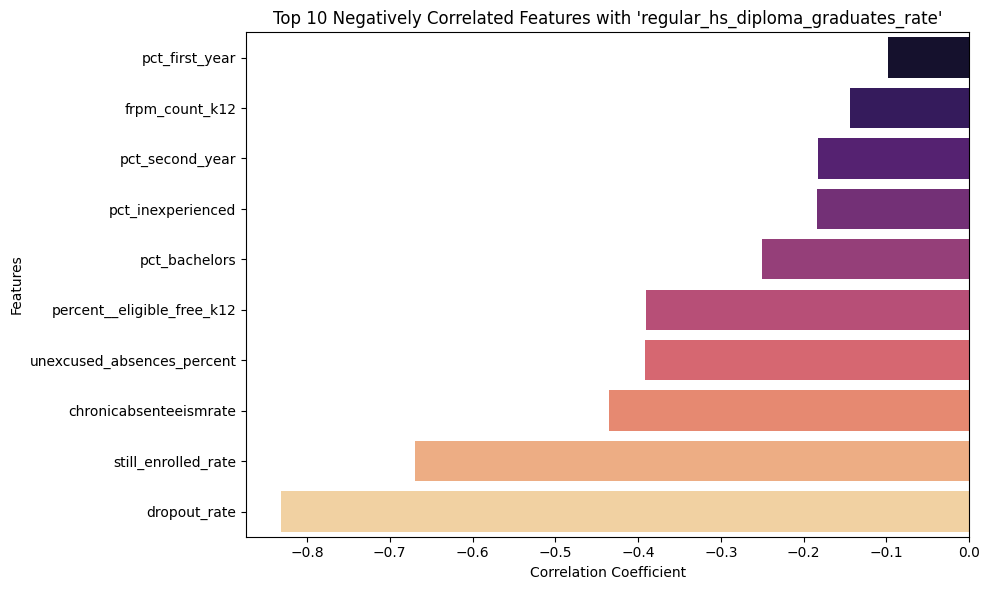

In [14]:
#Create Bar Chart for correlation with target variable
#Top 10 positively correlate features 
top_pos_corr = target_corr.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pos_corr.values, 
            y=top_pos_corr.index, 
            palette="viridis")
plt.title(f"Top 10 Positively Correlated Features with '{target}'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#Top 10 negatively correlate features
top_neg_corr = target_corr[target_corr < 0].tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neg_corr.values, 
            y=top_neg_corr.index, 
            palette="magma")
plt.title(f"Top 10 Negatively Correlated Features with '{target}'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### Scatter plots for Graduation Rate Correlation

Top 6 strongly correlated features with target variable:
['dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'unexcused_absences_percent', 'percent__eligible_free_k12', 'met_uccsu_grad_reqs_rate']


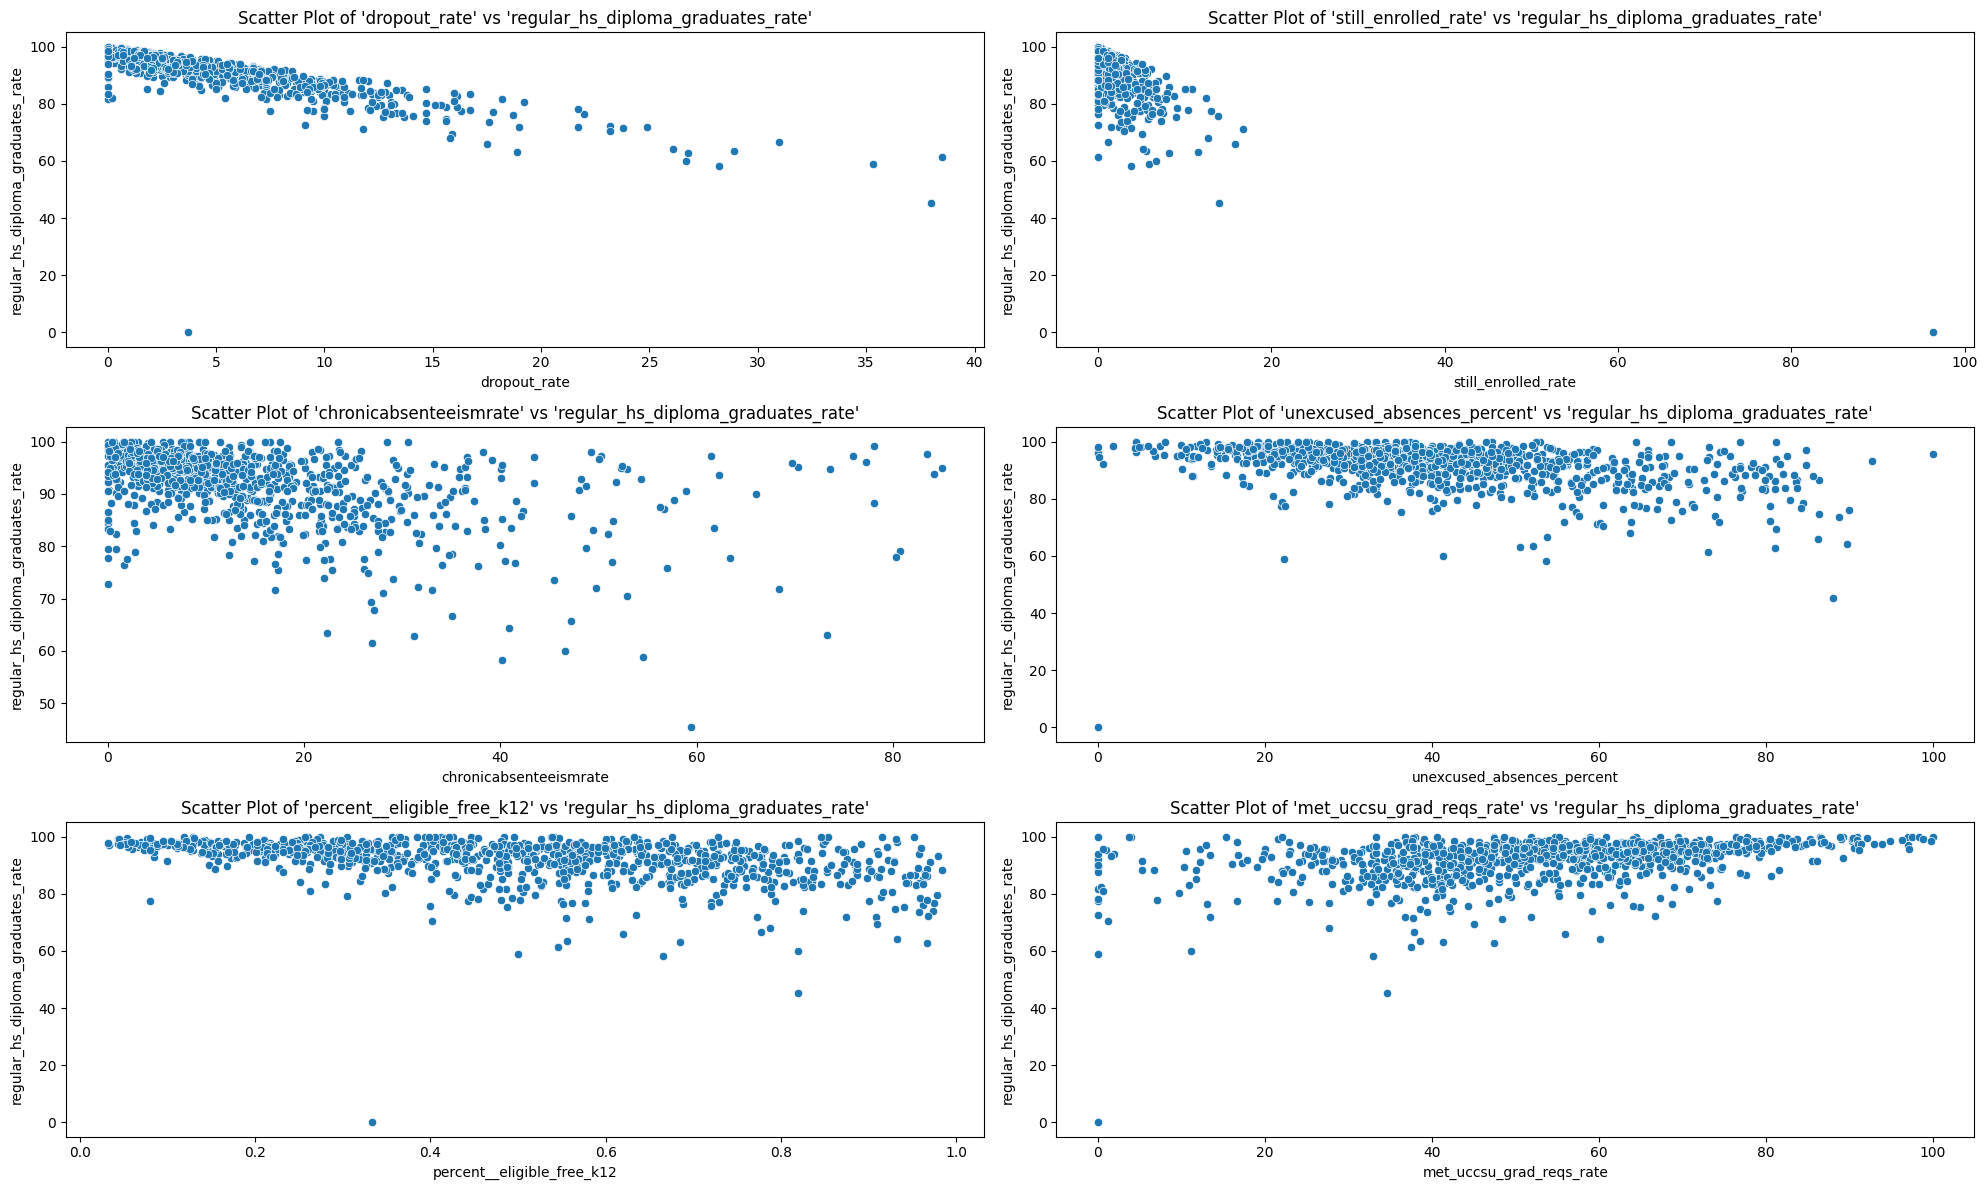

In [15]:
#Scatter plots for top 6 strongly correlated features with target variable
top_6_features = target_corr.abs().sort_values(ascending=False).head(6).index.tolist()
print ("Top 6 strongly correlated features with target variable:")
print(top_6_features)

#Scatter plots
n_cols = 2
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()
for i, feature in enumerate(top_6_features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of '{feature}' vs '{target}'")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target) 
plt.tight_layout()
plt.show()


## Categorical Features

In [16]:
df_cat = df[cat_cols].copy()
df_cat.describe()

,virtual,magnet,yearroundyn,multilingual
count,1067,1067,1067,1067
unique,3,3,2,3
top,N,N,N,N
freq,676,937,1014,919


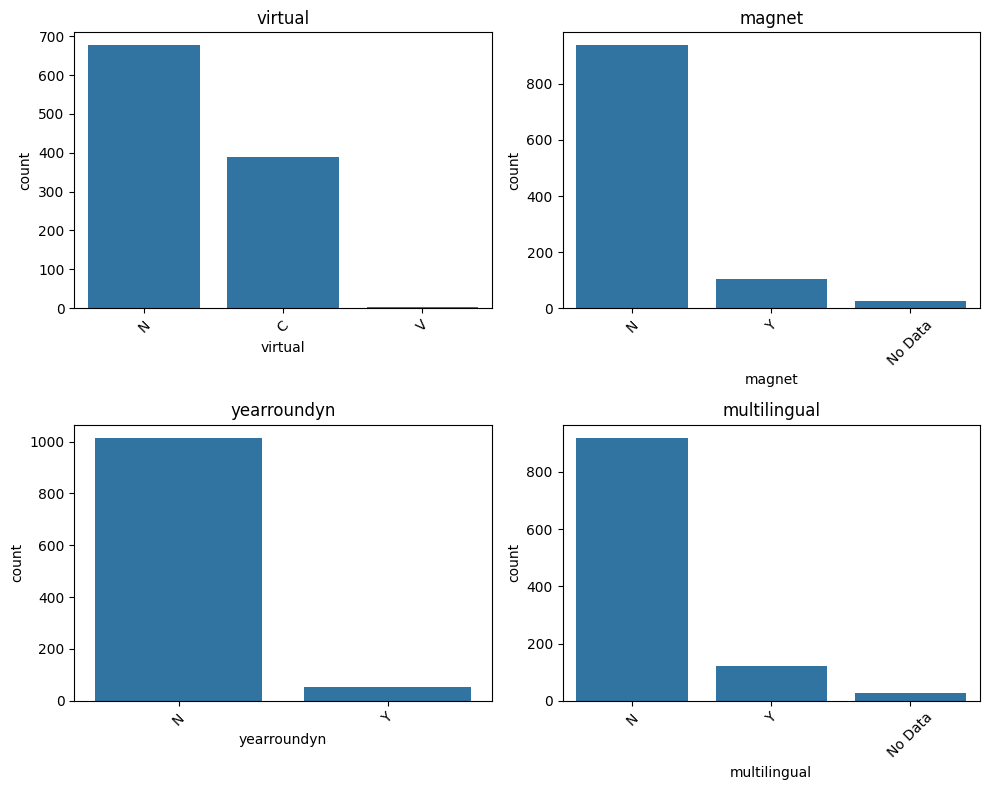

In [17]:
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### Categorical variables vs Graduation Rate

In [20]:
#Compare graduation rate by categorical features
for cat_col in cat_cols:
   print(f"\nGraduation rate statistics by '{cat_col}':")
   mean_values = df.groupby(cat_col)[target].mean().sort_values(ascending=False)
   print("Mean Graduation Rate:")
   print(mean_values)


Graduation rate statistics by 'virtual':
Mean Graduation Rate:
virtual
V    100.000000
C     92.257923
N     91.629167
Name: regular_hs_diploma_graduates_rate, dtype: float64

Graduation rate statistics by 'magnet':
Mean Graduation Rate:
magnet
N          92.046727
Y          90.377143
No Data          NaN
Name: regular_hs_diploma_graduates_rate, dtype: float64

Graduation rate statistics by 'yearroundyn':
Mean Graduation Rate:
yearroundyn
Y    92.228000
N    91.850797
Name: regular_hs_diploma_graduates_rate, dtype: float64

Graduation rate statistics by 'multilingual':
Mean Graduation Rate:
multilingual
N          91.922222
Y          91.482203
No Data          NaN
Name: regular_hs_diploma_graduates_rate, dtype: float64


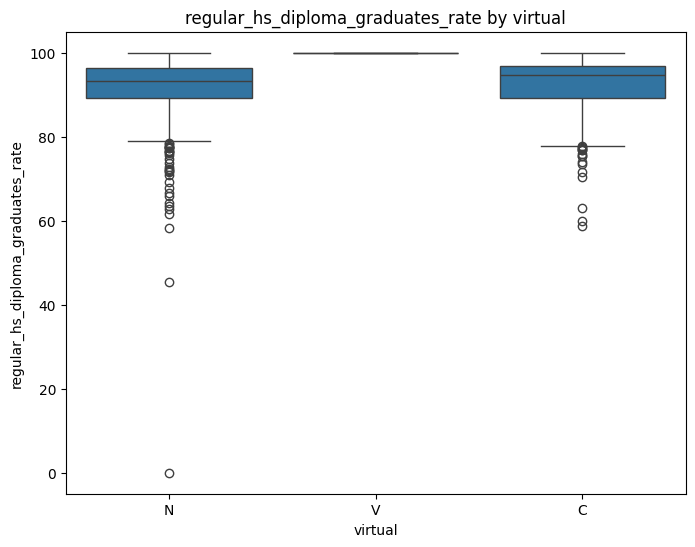

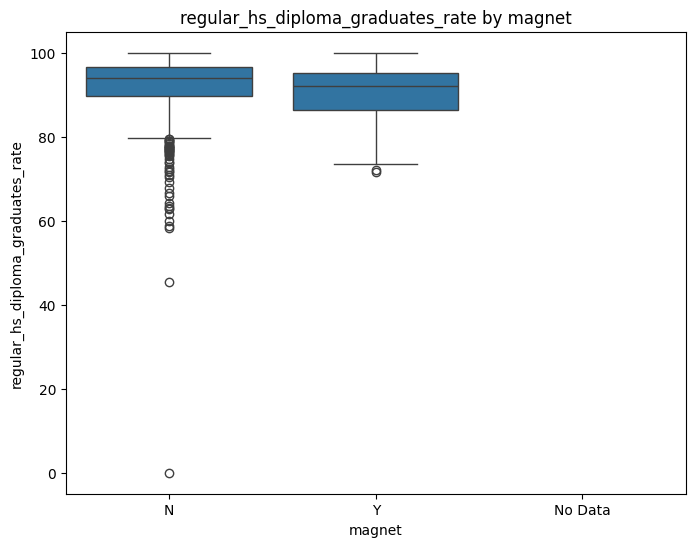

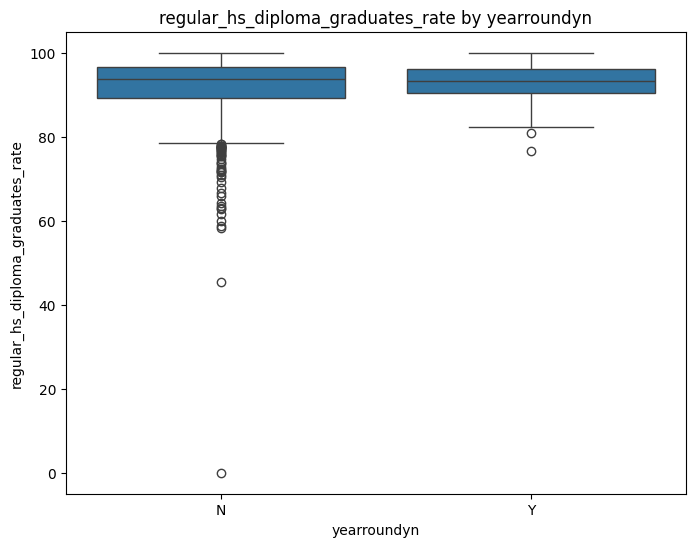

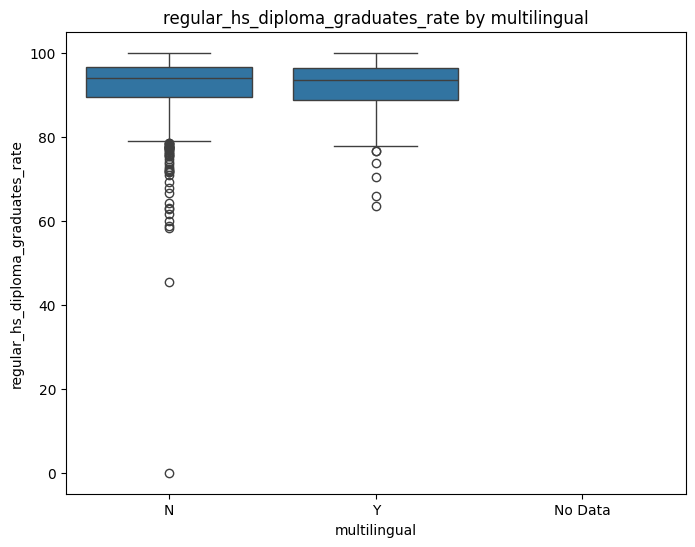

In [22]:
#Boxplots- Categorical features vs target variable
for cat_col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_col, y=target, data=df)
    plt.title(f"{target} by {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel(target)
    plt.show()


# Summary for Bivariate Analysis 
### Key findings based on the bivariate analysis we did:
**1. Relationship Between Features and Multicollinearity**

We created a correlation matrix and obtained the features that were strongly correlated with each other.  This high correlation may cause multicollinearity issues and will need to be addressed before modeling. Those features were:

* 'avg_safety_score'  and 'school_climate_index': These two had a score of 1.00, which is a prefect correlation meaning that these could be measuring the same thing. 

* 'pct_experienced' and 'pct_inexperienced': These features had a score of -1.00 which is a perfect inverse meaning they are complementary measures. 

* 'cohortstudents' and 'eligible_cumulative_enrollment': The score for these features was 0.96 which has a high correlation, therefore it is measuring a similar enrollment conept.

* 'regular_hs_diploma_rate' and 'dropout rate': The score was -0.83 which is a strong inverse, as expected for the variables. 

**2. Correlation with Graduation Rate**

Next, we found the correlation of features with graduation rate. We found the features that positively and negatively correlate with Graduation rate. The following are features that showed a positive correlation, meaning they increase as graduation rates increase:

* 'met_uscsu_grad_reqs_rate'(0.38): Students who meet UC/CSU requirements are more likely to graduate
* 'stu_tch_ratio' (0.25): Higher student-teacher ratios correlate with a higher graduation. This is a surprising result and we would need to do further investigation on this. 
* 'pct_experienced' (0.18): More experienced teachers correlate with more graduation rates. 
* 'pct_bachelors_plus' (0.15): T eachers with credentials beyond bachelor's degree correlate with better outcomes
* 'seal_of_biliteracy_rate' (0.15): An academic achivement for high level of profeciency in one or more languages in addition to English.
* 'cohortstudents' (0.14): Larger cohorts tend to have slightly more graduation rates. 

The following are features that showed a negative correlation, meaning as they increase as graduation rates decrease:

* 'dropout_rate' (-0.83): This feature has a very strong negative relationship with graduation rates, which makes sense since they are opposite. 
* 'still_enrolled_rate' (-0.67): Students who did not graduation by the end of their cohort period and are still enrolled. 
* 'chronicabsenteeismrate' (-0.44): Chronic absenteeism has a negative correlation with graduation rate, therefore it is a strong indicator of lower graduation.
* 'unexcused_absences_percent' (-0.39): Unexcused absences also is a strong indicator of lower graduation rate as it leads students to disengage in school.
* 'percent_eligible_free_k12' (-0.39): This a socioeconomic inidcator and it has a negative correlation as well, thus this disadvantage has an impact on graduation rates. 
* 'pct_bachelors' (-0.25): Teachers with only a bachelor's degree correlates with lower graduation. 
* 'pct_inexperienced' (-0.18): Inexperienced teachers correlate negatively with graduation. 

**3.The Impacts of Categorical Variables**

Lastly, we examined the relationships categorical variables had with different school types. These were our findings: 
Virtual School:
* Fully virtual schools had a graduation rate of 100%
* Classroom based schools had a graduation rate of 92.3% 
* Non-virtual schools had a graduation rate of 91.6% 
Although there was a perfect score for virtual schools, it is important to keep in mind that there was a very small sample size.

Magnet Schools:
* Non-magnet schools had a graduation rate of 92.0%, while magnet schools had a graduation rate of 90.4%. There was a minimal difference between the two of only 1.6%. 

Year-round Schools:
* Year-round schools had a graduation rate of 92.2%, while traditional schools had a graduation rate of 91.9%. Again, the difference here is really small of only 0.3%. 

Multilingual Programs:
* For schools that were not multilingual the graduation rate was 91.9%, while the schools that were multilingual had a rate of 91.5%. There was a very small difference again of only 0.4%. 

Overall there is small difference in graduation rates based on school type and therefore they have minimal impact compared to the other factors. 


**4. Conclusion**

After conducting the bivariate analysis there were features that are stronger indicators for graduation rates compared to others. Attendance and engagement metrics have a stronger correlation with graduation rate, and followed by socioconomic factors. The features that had little impact was how the school was structures. There was also an unexpected positive correlation between graduation rates and the ratio between students and teachers which will need to be investigated more. 



 